In [17]:
import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alcohol_Sales.csv')
data = df['S4248SM144NCEN'].values.reshape(-1,1)

In [43]:
window = 12
train_size = int(len(data) * 0.8)

train_raw = data[:train_size]
test_raw  = data[train_size - window:]

In [44]:
# 2. 정규화
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_raw)
test_scaled  = scaler.transform(test_raw)

In [45]:
# 3. 시퀀스 생성
def make_xy(data, window):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

x_train, y_train = make_xy(train_scaled, window)
x_test,  y_test  = make_xy(test_scaled,  window)

In [48]:
# 4. LSTM 모델
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(window,1)),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1)])
model.compile(optimizer='adam', loss='mse')
model.fit(x_train, y_train, epochs=50, batch_size=8, verbose=1)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0949
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0111
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0092
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0111
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0092
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0087
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0092
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0094
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0092
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0087
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0081
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0101
Epoch 13/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0079
Epoch 14/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0092
Epoch 15/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0076
Epoch 16/50
31/31 ━━━━

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Test MSE: 0.0309


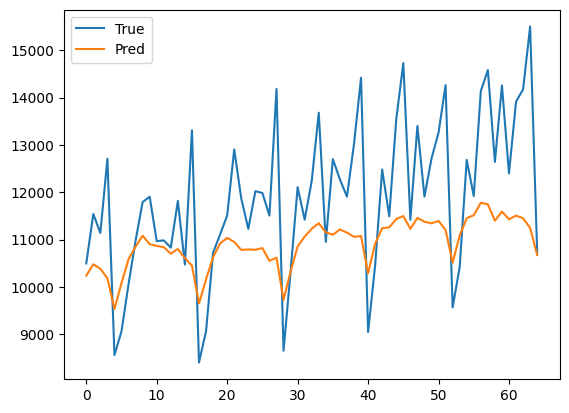

In [49]:
# 5. 예측
pred_train = model.predict(x_train)
pred_test  = model.predict(x_test)
plt.plot(scaler.inverse_transform(y_test), label='True')
plt.plot(scaler.inverse_transform(pred_test), label='Pred')

mse = mean_squared_error(y_test, pred_test)
print(f"Test MSE: {mse:.4f}")
plt.legend(); plt.show()